# Comparing Standard python with optimisation techniques

+---------------------------------------+------------------+
| Function                              |   Time (seconds) |
+=======================================+==================+
| Standard Python (Sum of Squares):     |       9.64354    |
+---------------------------------------+------------------+
| Standard Python (Fibonacci):          |       0.0107446  |
+---------------------------------------+------------------+
| Standard Python (Factorial):          |       1.6762e-05 |
+---------------------------------------+------------------+
| Standard Python (Mean):               |       4.84304    |
+---------------------------------------+------------------+
| Standard Python (Standard Deviation): |      20.4175     |
+---------------------------------------+------------------+
| Memoized Python (Sum of Squares):     |      12.8637     |
+---------------------------------------+------------------+
| Memoized Python (Fibonacci):          |       1.3124e-05 |
+-----------------------

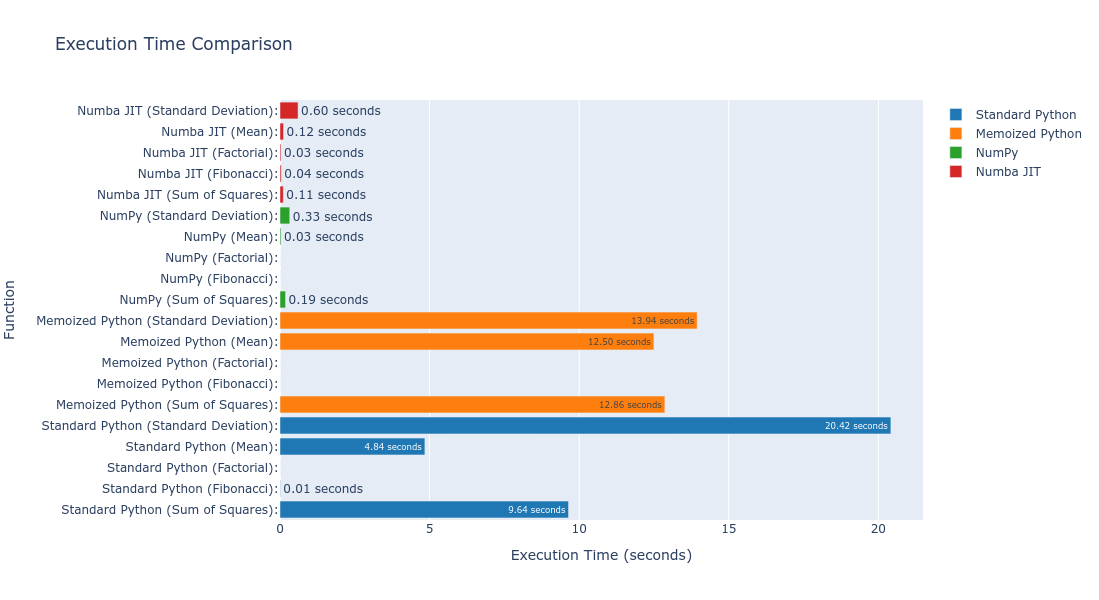

In [28]:
import numpy as np
from numba import jit
import timeit
from tabulate import tabulate
import matplotlib.pyplot as plt

# Manual memoization for sum of squares
sum_of_squares_cache = {}
def python_sum_of_squares_memoized(arr):
    if tuple(arr) not in sum_of_squares_cache:
        result = 0
        for num in arr:
            result += num * num
        sum_of_squares_cache[tuple(arr)] = result
    return sum_of_squares_cache[tuple(arr)]

# Manual memoization for Fibonacci
fibonacci_cache = {}
def python_fibonacci_memoized(n):
    if n not in fibonacci_cache:
        if n <= 1:
            fibonacci_cache[n] = n
        else:
            fibonacci_cache[n] = python_fibonacci_memoized(n-1) + python_fibonacci_memoized(n-2)
    return fibonacci_cache[n]

# Manual memoization for factorial
factorial_cache = {}
def python_factorial_memoized(n):
    if n not in factorial_cache:
        if n == 0:
            factorial_cache[n] = 1
        else:
            factorial_cache[n] = n * python_factorial_memoized(n-1)
    return factorial_cache[n]

# Manual memoization for mean
mean_cache = {}
def python_mean_memoized(arr):
    if tuple(arr) not in mean_cache:
        mean_cache[tuple(arr)] = sum(arr) / len(arr)
    return mean_cache[tuple(arr)]

# Manual memoization for standard deviation
stddev_cache = {}
def python_stddev_memoized(arr):
    if tuple(arr) not in stddev_cache:
        mean = sum(arr) / len(arr)
        variance = sum((x - mean) ** 2 for x in arr) / len(arr)
        stddev_cache[tuple(arr)] = variance ** 0.5
    return stddev_cache[tuple(arr)]

# Standard Python function for sum of squares
def python_sum_of_squares(arr):
    result = 0
    for num in arr:
        result += num * num
    return result

# Standard Python function for Fibonacci
def python_fibonacci(n):
    if n <= 1:
        return n
    else:
        return python_fibonacci(n-1) + python_fibonacci(n-2)

# Standard Python function for factorial
def python_factorial(n):
    if n == 0:
        return 1
    else:
        return n * python_factorial(n-1)

# Standard Python function for calculating mean
def python_mean(arr):
    return sum(arr) / len(arr)

# Standard Python function for calculating standard deviation
def python_stddev(arr):
    mean = sum(arr) / len(arr)
    variance = sum((x - mean) ** 2 for x in arr) / len(arr)
    return variance ** 0.5

# Numpy function for sum of squares
def numpy_sum_of_squares(arr):
    return np.sum(arr ** 2)

# Numpy function for Fibonacci
def numpy_fibonacci(n):
    fib = np.zeros(n+1)
    fib[1] = 1
    for i in range(2, n+1):
        fib[i] = fib[i-1] + fib[i-2]
    return fib[n]

# Numpy function for factorial
def numpy_factorial(n):
    return np.prod(np.arange(1, n+1))

# Numpy function for calculating mean
def numpy_mean(arr):
    return np.mean(arr)

# Numpy function for calculating standard deviation
def numpy_stddev(arr):
    return np.std(arr)

# Warm-up Numba JIT functions
@jit
def numba_sum_of_squares(arr):
    result = 0
    for num in arr:
        result += num * num
    return result

@jit
def numba_fibonacci(n):
    if n <= 1:
        return n
    else:
        return numba_fibonacci(n-1) + numba_fibonacci(n-2)

@jit
def numba_factorial(n):
    if n == 0:
        return 1
    else:
        return n * numba_factorial(n-1)

@jit
def numba_mean(arr):
    result = 0
    for num in arr:
        result += num
    return result / len(arr)

@jit
def numba_stddev(arr):
    mean = np.mean(arr)
    variance = np.sum((arr - mean) ** 2) / len(arr)
    return variance ** 0.5

# Generate a large random array
arr = np.random.rand(10**7)

# Measure time for each function
results = []

# Time standard Python functions
results.append(["Standard Python (Sum of Squares):", timeit.timeit(lambda: python_sum_of_squares(arr), number=10)])
results.append(["Standard Python (Fibonacci):", timeit.timeit(lambda: python_fibonacci(20), number=10)])
results.append(["Standard Python (Factorial):", timeit.timeit(lambda: python_factorial(20), number=10)])
results.append(["Standard Python (Mean):", timeit.timeit(lambda: python_mean(arr), number=10)])
results.append(["Standard Python (Standard Deviation):", timeit.timeit(lambda: python_stddev(arr), number=10)])

# Time memoized Python functions
results.append(["Memoized Python (Sum of Squares):", timeit.timeit(lambda: python_sum_of_squares_memoized(arr), number=10)])
results.append(["Memoized Python (Fibonacci):", timeit.timeit(lambda: python_fibonacci_memoized(20), number=10)])
results.append(["Memoized Python (Factorial):", timeit.timeit(lambda: python_factorial_memoized(20), number=10)])
results.append(["Memoized Python (Mean):", timeit.timeit(lambda: python_mean_memoized(arr), number=10)])
results.append(["Memoized Python (Standard Deviation):", timeit.timeit(lambda: python_stddev_memoized(arr), number=10)])

# Time NumPy functions
results.append(["NumPy (Sum of Squares):", timeit.timeit(lambda: numpy_sum_of_squares(arr), number=10)])
results.append(["NumPy (Fibonacci):", timeit.timeit(lambda: numpy_fibonacci(20), number=10)])
results.append(["NumPy (Factorial):", timeit.timeit(lambda: numpy_factorial(20), number=10)])
results.append(["NumPy (Mean):", timeit.timeit(lambda: numpy_mean(arr), number=10)])
results.append(["NumPy (Standard Deviation):", timeit.timeit(lambda: numpy_stddev(arr), number=10)])

# Time Numba JIT functions
results.append(["Numba JIT (Sum of Squares):", timeit.timeit(lambda: numba_sum_of_squares(arr), number=10)])
results.append(["Numba JIT (Fibonacci):", timeit.timeit(lambda: numba_fibonacci(20), number=10)])
results.append(["Numba JIT (Factorial):", timeit.timeit(lambda: numba_factorial(20), number=10)])
results.append(["Numba JIT (Mean):", timeit.timeit(lambda: numba_mean(arr), number=10)])
results.append(["Numba JIT (Standard Deviation):", timeit.timeit(lambda: numba_stddev(arr), number=10)])

# Print results in a table
print(tabulate(results, headers=["Function", "Time (seconds)"], tablefmt="grid"))

import plotly.graph_objects as go

# Extract function names and execution times
functions = [result[0] for result in results]
execution_times = [result[1] for result in results]

# Assigning colors for each function
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Define techniques
techniques = ['Standard Python', 'Memoized Python', 'NumPy', 'Numba JIT']

# Create a Plotly figure
fig = go.Figure()

# Add bars for each technique
for i, technique in enumerate(techniques):
    functions_in_technique = functions[i * 5: (i + 1) * 5]
    execution_times_in_technique = execution_times[i * 5: (i + 1) * 5]
    
    fig.add_trace(go.Bar(
        y=functions_in_technique,
        x=execution_times_in_technique,
        name=technique,
        marker_color=[colors[i] for _ in range(5)],  # Assigning color for each bar in the group
        orientation='h',
        text=[f"{t:.2f} seconds" for t in execution_times_in_technique],  # Display text on hover
        hoverinfo='text'
    ))

# Customize layout
fig.update_layout(
    title='Execution Time Comparison',
    xaxis_title='Execution Time (seconds)',
    yaxis_title='Function',
    height=600,
    barmode='group'  # Group bars by technique
)

# Show the figure
fig.show()

